#4-1부: 데이터 가공

In [8]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# import scipy.stats as sc # 고급 통계 확률 계산 
import seaborn as sns

In [9]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
#check if data is type DataFrame
type(iris)

#Check if variable species exists as type series in col 4
species = iris.iloc[:,4]
type(species)

pandas.core.series.Series

In [11]:
storms = pd.read_csv("/content/storms.csv")
storms

,Unnamed: 0,storm,wind,pressure,date
0,1,Alberto,110,1007,2000-08-03
1,2,Alex,45,1009,1998-07-27
2,3,Allison,65,1005,1995-06-03
3,4,Ana,40,1013,1997-06-30
4,5,Arlene,50,1010,1999-06-11
5,6,Arthur,45,1010,1996-06-17


df.head()
df.head(n = 2)
df.tail()
df.tail(3)
df.dtypes
df.shape :
df.info()

: 첫 다섯 줄 출력 또는 df.head() : 첫 두 줄 출력
: 마지막 다섯 줄 출력 
: 마지막 세 줄 출력
: 데이터프레임의 모든 변수에 대한 데이터 타입만 출력 데이터프레임 (테이블)의 모양 (또는 크기)에 대한 정보 출력 
: 데이터프레임에 대한 간략한 정보 출력

In [12]:
storms.head(2)
storms.tail()
storms.tail(3)
storms.dtypes
storms.shape
storms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6 non-null      int64 
 1   storm       6 non-null      object
 2   wind        6 non-null      int64 
 3   pressure    6 non-null      int64 
 4   date        6 non-null      object
dtypes: int64(3), object(2)
memory usage: 368.0+ bytes


## 2.1 관측값 추리기

df.loc[] 와 df.iloc[] 로 행 (또는 열, 또는 행과 열) 선택

In [13]:
# 연습 1: storms 데이터의 행 0 (첫번째 줄) 부터 행 2 (세번째 줄)까지 선택하라.
storms.iloc[0:3]
storms.head()

# 연습 2: storms 데이터의 첫 네 줄과 storm , wind 변수의 값만을 선택하라.
storms.iloc[0:4, 1:3]

,storm,wind
0,Alberto,110
1,Alex,45
2,Allison,65
3,Ana,40


### 2.1.1 통계분석 시 데이터를 바라보는 관점


*   행(관측값)들은 모두 특별한 의미가 없는 여러 관측값 중의 하나
*   열(변수)들은 의미가 있는 특별한 값
*   따라서 관측값을 선택할 때는 systematic 하게 index 별로 0:10로 하기보다, 특정한 조건에 따라 관측값을 추리는 경우가 더 많다.
*    질문(query)의 답 (True, False) 에 따라 데이터 선택

In [14]:
# only ones with wind >= 50
storms.query('wind >= 50')

,Unnamed: 0,storm,wind,pressure,date
0,1,Alberto,110,1007,2000-08-03
2,3,Allison,65,1005,1995-06-03
4,5,Arlene,50,1010,1999-06-11


### 2.1.2 관측값 추리기 df[조건] 또는 df.query(조건) 을 이용한다.



*   연습 1: storms 데이터에서 wind speed가 60마일 이상인 item들의 Boolean series를 만들어라
연습 2:   의 결과를 확인하라.
연습 3:   를 이용하여, 연습 2의 결과와 같은 결과를 도출하자.
연습 4 (여러 개의 조건): storms 데이터에서 wind speed가 60마일 이상이며, 기압이 1006 이상인 item을 골라내어라.
연습 5 (여러 개의 조건): storms 데이터에서 wind speed가 50마일 미만이며, 이름이 "Alberto","Allison", "Alex" 중의 하나인 item을 골라 내어라.
*   List item



In [15]:
# 연습 1: storms 데이터에서 wind speed가 60마일 이상인 item들의 Boolean series를 만들어라
storms.wind >= 60

#연습 2: storms[storms.wind>=60] 의 결과를 확인하라
storms[storms.wind >= 60]

# 연습 3: df.query('wind >= 50') 를 이용하여, 연습 2의 결과와 같은 결과를 도출하자.
storms.query('wind >= 60')

#연습 4 (여러 개의 조건): storms 데이터에서 wind speed가 60마일 이상이며, 기압이 1006 이상인 item을 골라내어라.
storms[(storms.wind>=60) & (storms.pressure >= 1006)]
storms[(storms['wind']>=60) & (storms.pressure >=1006)]
storms.query('wind >=60 and pressure >=1006')

#연습 5 (여러 개의 조건): storms 데이터에서 wind speed가 50마일 미만이며, 이름이 "Alberto","Allison", "Alex" 중의 하나인 item을 골라 내어라.
storms[(storms.wind<50) & storms['storm'].isin(['Alberto', 'Allison','Alex'])]
storms.query('wind>=50 and storm ==["Alberto","Allison", "Alex"]')

,Unnamed: 0,storm,wind,pressure,date
0,1,Alberto,110,1007,2000-08-03
2,3,Allison,65,1005,1995-06-03


### 2.1.3 표본 추출

관측값 중 일부를 랜덤하게 골라야 할 때도 있음


*   df.sample(frac = 0.5) : 50%의 자료를 랜덤하게 선택
*   df.sample(n = 10) : 10개의 자료를 랜덤하게 선택



> 복원추출: 한번 뽑은 아이템을 다시 뽑을 수 있음. 

> 비복원추출: 한번 뽑은 아이템은 다시 뽑히지 않음.

> 예를 들어, {A,B,C} 중 두 아이템을 비복원추출한다면 (A,B), (A,C), (B,C) 중 하나의 결과. 그러나 {A,B,C} 중 두 아이템을 복원추출한다면 (A,A), (B,B), (C,C)도 추출될 수 있음.




In [16]:
# 연습 1: storms 데이터에서 3개의 자료를 랜덤하게 선택하여라.
storms.sample(3)

# 연습 2: storms 데이터에서 25%의 자료를 랜덤하게 선택하여라.
storms.sample(frac = 0.25)

#연습 3: storms 데이터에서 모두 10개의 자료를 복원추출하여라. (힌트: Shift + Tab 으로 매뉴얼 보기)
storms.sample(10, replace = True)

,Unnamed: 0,storm,wind,pressure,date
1,2,Alex,45,1009,1998-07-27
2,3,Allison,65,1005,1995-06-03
4,5,Arlene,50,1010,1999-06-11
1,2,Alex,45,1009,1998-07-27
5,6,Arthur,45,1010,1996-06-17
4,5,Arlene,50,1010,1999-06-11
4,5,Arlene,50,1010,1999-06-11
2,3,Allison,65,1005,1995-06-03
1,2,Alex,45,1009,1998-07-27
1,2,Alex,45,1009,1998-07-27


## 2.2 데이터 정렬


In [17]:
#sort so that 'wind' col is in order
storms.sort_values('wind')

,Unnamed: 0,storm,wind,pressure,date
3,4,Ana,40,1013,1997-06-30
1,2,Alex,45,1009,1998-07-27
5,6,Arthur,45,1010,1996-06-17
4,5,Arlene,50,1010,1999-06-11
2,3,Allison,65,1005,1995-06-03
0,1,Alberto,110,1007,2000-08-03


### 2.2.1 사용법


```
# df.sort_values(
by,
axis: 'Axis' = 0,
ascending=True ... )
```

*   by = 'wind' : 정렬 기준이 되는 변수 이름
*   0 (행)이 기본
*   0 (행)이 기본
ascending = False
는 내림차순 정렬

In [18]:
# 연습 1: storms 데이터를 wind speed가 빠른 item부터 정렬하여라.
storms.sort_values('wind', ascending = False)

# 연습 2: storms 데이터를 wind speed로 느린 순으로 정렬한 뒤, 오래된 순으로 정렬하여라.
storms.sort_values(by = ['wind','date'])

# 연습 3: storms 데이터를 wind speed가 빠른 순으로 정렬한 뒤, 오래된 순으로 정렬하여라.
storms.sort_values(by = ['wind','date'], ascending = [False, True])

,Unnamed: 0,storm,wind,pressure,date
0,1,Alberto,110,1007,2000-08-03
2,3,Allison,65,1005,1995-06-03
4,5,Arlene,50,1010,1999-06-11
5,6,Arthur,45,1010,1996-06-17
1,2,Alex,45,1009,1998-07-27
3,4,Ana,40,1013,1997-06-30


## 2.3 변수 선택

데이터프레임이 클 때, 관심있는 변수만을 선택하거나, 쓸모없는 변수를 제거.

 (paste)

In [19]:
 storms[['storm', 'pressure']]
 storms.loc[:, 'wind':'date']
 storms.iloc[:, 1:]
 storms.filter(['pressure', 'wind', 'date'])
 storms.drop(columns = 'storm')
 storm_name = storms.pop('storm')
 storm_name

0    Alberto
1       Alex
2    Allison
3        Ana
4     Arlene
5     Arthur
Name: storm, dtype: object

In [20]:
storms.insert(1,'storm', storm_name)
storms
storms.filter(regex ='[sw]') # s 와 w 가 포함된 모든 변수명 선택 storms. select_dtypes(include= np. number)

,storm,wind,pressure
0,Alberto,110,1007
1,Alex,45,1009
2,Allison,65,1005
3,Ana,40,1013
4,Arlene,50,1010
5,Arthur,45,1010


## 2.4 새로운 변수 생성 (assign)


*   새로운 변수 ratio = pressure / wind 생성하여 데이터프레임에 추가



### 2.4.1 새로운 Series 를 만들어서 추가하는 방법

In [21]:
ratio_Series = storms.pressure/storms.wind
storms.assign(ratio = ratio_Series)

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444


### 2.4.2 한 줄로 해결하는 방법

In [22]:
storms.assign(ratio = storms.pressure/storms.wind)

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444


### 2.4.3 익명함수를 이용하는 방법



*   python은 익명 함수 혹은 람다 함수라고 하는 값을 반환하는 단순한 한 문장으로 이루어진 함수를 지원한다.

*   lambda 예약어로 정의하며, 이는 '익명함수를 선언한다'라는 의미다.

*   람다 함수는 데이터 분석에서 특히 편리한데, 이는 데이터를 변형하는 함수에서 인자로 함수를 받아야하는 경우가 매우 많기 때문이다.
*   일반적인 이름이 있는 함수는 다음과 같이 정의한다.





In [23]:
def ratio(x,y):
    return x/y

ratio(storms.pressure, storms.wind)

# you can use colums as inputs of functions

0     9.154545
1    22.422222
2    15.461538
3    25.325000
4    20.200000
5    22.444444
dtype: float64

In [24]:
storms.assign(ratio = ratio(storms.pressure, storms.wind))

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444


In [25]:
# or you can use df as input

def ratio_df(df):
    return df.pressure/df.wind

ratio_df(storms)

0     9.154545
1    22.422222
2    15.461538
3    25.325000
4    20.200000
5    22.444444
dtype: float64

In [26]:
storms.assign(ratio = ratio_df(storms))

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444




*   ratio_df 함수는 데이터프레임을 인자로 받아 그 안의 pressure 와 wind 의 비를 계산하는 함수이지만, 일회용이다.
*   다음과 같이 이름이 없는 익명함수인 람다함수로 지정할 수 있다.



In [27]:
storms.assign(ratio = lambda df:df.pressure/df.wind)

,Unnamed: 0,storm,wind,pressure,date,ratio
0,1,Alberto,110,1007,2000-08-03,9.154545
1,2,Alex,45,1009,1998-07-27,22.422222
2,3,Allison,65,1005,1995-06-03,15.461538
3,4,Ana,40,1013,1997-06-30,25.325000
4,5,Arlene,50,1010,1999-06-11,20.200000
5,6,Arthur,45,1010,1996-06-17,22.444444


### 2.4.4 연습


1.   storms 데이터프레임에 ratio 와 (km 단위로 변환한 wind speed)의 두 변수를 추가하여 storms1 이라는 이름으로 저장하라.
2.    두 변수가 추가된 데이터프레임 에서 Unnamed:0 컬럼과 wind 컬럼을 제거하여 storms2 이라는 이름으로 저장하라.

In [28]:
#1
storms1 = storms.assign(ratio = lambda df:df.pressure/df.wind, wind_df = lambda df:df.wind*1.6)
storms1

#2
storms2 = storms1.drop(columns = ['Unnamed: 0', 'wind'])
storms2

,storm,pressure,date,ratio,wind_df
0,Alberto,1007,2000-08-03,9.154545,176.0
1,Alex,1009,1998-07-27,22.422222,72.0
2,Allison,1005,1995-06-03,15.461538,104.0
3,Ana,1013,1997-06-30,25.325000,64.0
4,Arlene,1010,1999-06-11,20.200000,80.0
5,Arthur,1010,1996-06-17,22.444444,72.0


## 2.5 데이터 축약 (aggregate)



*   df.대상변수명.agg(['함수명1','함수명2'])
*   또는 

```
df.agg(
축약이름1 = ('대상변수명1',함수명1),
축약이름2 = ('대상변수명2',함수명2)
)
```





In [29]:
pollution = pd.read_csv("/pollution.csv")
pollution = pollution.iloc[:,1:] #delete first row(?)
pollution

FileNotFoundError: ignored

In [ ]:
{'mean' : pollution.amount.mean(), 
 'sum': pollution.amount.sum(),
 'n' : pollution.amount.count()}

In [ ]:
pollution.amount.agg(['mean', 'sum', 'count'])

In [ ]:
#dataframe 형태로
pollution.agg(
    mean = ('amount', np.mean),
    sum = ('amount', np.sum),
    n = ('amount', len)
)

paste paste

In [ ]:
pollution.describe()

### 2.5.1 연습

In [ ]:
storms

In [ ]:
# 연습 1. storms 자료에서 wind speed가 50 이상인 폭풍우의 갯수와 평균 pressure 를 구하라. 힌트: query() 후 aggregate() .

storms.query('wind >= 50').pressure.agg(['mean', 'count'])

#or

(
    storms.query('wind >= 50').agg(
        count = ('pressure', len),
        mean = ('pressure', np.mean)
    )
)

### 2.5.2 그룹별 요약 (groupby + agg)

그룹 변수의 값에 따라 그룹을 지정한 뒤, 각 그룹별로 데이터 요약을 한다.

아래의 예는 한 가지 요약 ( amount 의 평균)을 도시( city 변수)별로 구했다.

In [ ]:
pollution.groupby('city').mean()

아래의 예는 여러 가지 요약 ( amount 의 평균, 합, 갯수)을 도시( city 변수)별로 구했다.

In [ ]:
pollution.groupby('city').agg(['mean', 'sum', 'count'])

In [ ]:
#or
pollution. groupby('city'). agg( 
    mean = ('amount', np.mean), 
    sum = ('amount', sum), 
    count = ('amount',len)
)

### 2.5.3 변수별로 다른 요약

다음과 같이, 딕셔너리 형태의 요약 명령도 가능하다.



```
df.groupby('그룹변수').agg({
'변수명1' : ['mean', 'min'],
'변수명2' : ['mean', 'min', 'max']
})
```



In [ ]:
iris.groupby('species').agg({
    'sepal_length': ['mean','min'],
    'sepal_width': ['median']
})

## 3. 관계형 데이터베이스를 다루는 첫걸음

## 3.1 관계형 자료


In [ ]:
# read datasets
flights = pd.read_csv('/flights.csv')
flights.drop(columns = 'Unnamed: 0')
flights.head()

In [ ]:
airlines = pd.read_csv('/airlines.csv')
airlines.drop(columns = 'Unnamed: 0')
airlines.head()

In [ ]:
airports = pd.read_csv("/airports.csv")
airports.drop(columns = 'Unnamed: 0')
airports.head()

In [ ]:
(flights
 .query('month ==1 and day==1 and abs(dep_delay)>30')
 [['dep_time', 'arr_time', 'carrier', 'flight', 'tailnum', 'origin', 'dest']].head())

### 3.1.1 원 자료와 참조자료



*   위 자료에서 carrier = AA 가 무슨 뜻일까?
*   참조자료 airlines 를 보면 알 수 있다.



In [ ]:
airlines.head(2)

두 자료표의 변수 carrier 와 carrier 가 (이름이 다를 수도 있다) 두 자료표를 연결하는 열쇠(Key)이다.

## 3.2 자료와 연결 열쇠들


*   'carrier' 변수가 flights 자료와 'airlines' 자료를 연결하는 열쇠다.


### 3.2.1 두 자료표의 연결 (merge)



1.   원 자료   의   변수의 값 (예를 들면, AA)이 나올 때마다,
2.   참조자료   의   변수의 값 (즉, AA)에 해당하는 name 변수의 값 (즉, American Airlines Inc.)을
3. 원 자료에 더해준다.


```
pd.merge(flights, airlines, on='carrier', how='left')
```
또는

```
flights.merge(airlines, on='carrier', how = 'left')
```






In [ ]:
pd.merge(flights, airlines, on='carrier', how='left')[['dep_time', 'arr_time', 'carrier', 'origin', 'dest', 'name']].head()

In [ ]:
flights.merge(airlines, on='carrier', how = 'left'
)[['dep_time','arr_time', 'carrier','origin','dest','name']].head()

### 3.2.2 연습

paste correctly


*   flights 자료의 dep_delay 변수는 비행기의 출발 지연시간을 나타낸다.
미국의 두 대표적인 비행사인 UA 와 DL 별로 비행기의 출발지연시간의 평균과 표준편차를 구하여 비교해보라. 결과는 다음과 같이 나타나야 한다.
*   다음의 다섯 가지 연산을 순차적으로 적용하여 해결하자.

1.  flights 자료의 dep_delay 변수와 carrier 변수만 선택한다. 
2. carrier 변수의 값이 UA 또는 DL 인 관측값만 고른다. 
3. carrier 에 따라 그룹을 짓는다.
4. 그룹별로 데이터를 축약한다.
5. 참조자료 (airlines) 를 연결하여 carrier 이름을 바꾸어 준다.





In [ ]:
flights
solvemeklfwmff

### 3.2.3 두 자료표의 연결: key 지정

paste

In [ ]:
flights.merge(airports, left_on = 'dest', right_on ='faa', how='left'
)[['dep_time', 'arr_time', 'carrier', 'origin', 'dest', 'name']].head()

### left join

*   왼쪽의 원자료표의 모든 엔트리를 보존하는 자료 병합
*   ```
merge(..., how = 'left',...)
```




### Inner Join



*   왼쪽과 오른쪽의 두 자료표에서 **공통된** 엔트리만 보존하는 자료 병햡
*   ` merge(..., how = 'inner',...)`



In [ ]:
flights.merge(airports, left_on = 'dest', right_on='faa', how='inner'
)[['dep_time', 'arr_time', 'carrier', 'origin', 'dest', 'name']].head()

#4-2부 데이터 시각화 Seaborn

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 0.1 맛보기

### 0.1.1 seaborn에 저장된 데이터

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.head()

### 0.1.2 연속형 변수의 분포 조사

Q: 팔머 군도 펭귄의 날개 길이는 얼마나 길까?

In [ ]:
# displot = frquency histogram of the col flipper_length_mm

sns.displot(data=penguins, x='flipper_length_mm')

### 0.1.3 두 변수의 관계

Q: 팔머 군도 펭귄의 날개 길이가 길면 부리 길이도 길까?

In [ ]:
#relplot = scatter plot of col flipper_length_mm & col bill_length_mm

sns.relplot(data=penguins, x='flipper_length_mm', y="bill_length_mm", hue="sex")

### 0.1.4 범주형 변수의 값에 따른 분포 조사


In [ ]:
sns.catplot(x='species', y='flipper_length_mm', hue='sex', data=penguins)

### 0.1.5 seaborn에서 제공하는 통계 그래프의 종류

1. 두 (수치형) 변수의 관계(relation) ( relplot )
2. 한 변수 (또는 두 변수)의 분포(distribution) ( displot )
3. 범주형(categorical) 변수의 값에 따른 수치형 변수의 조건부 분포 ( catplot ) 4. 회귀분석(regression analysis)과 관련된 그래프 ( regplot , lmplot )
5. 의미에 따라 나누어진 여러 개의 플롯 ( FacetGrid )


> 수업에서는 1,2,3번을 다룸. 
> 4,5번은 수업자료 참조.



### 0.1.6 Figure-level 함수 vs axes-level 함수

* Seaborn 패키지는 분석하는 데이터의 구조에 따라서 크게 세가지(관계형, 분포형, 범주형)으로 나눠서 패키지를 제공하고 있다. 이외에 회귀, 행렬 데이터를 그려주는 함수들도 포함되어 있다.

* 상위 레벨에 쓰여 있는 함수들은 Figure-level함수(고수준), 하위 레벨에 쓰여 있는 함수들은 axes-level함수(저수준)로 불린다.

* "고수준"은 사용자가 디테일한 수준까지 설정할필요없이, 몇가지 설정으로만 사용할 수 있다는 것이다. 쉽게얘기하면, 그래프를 조금 더 쉽게 그려주는 페키지이다.

* "저수준"은 디테일한 수준까지 고려할 수 있음을 의미한다.

* Figure-level 함수의 kind 옵션에 해당 함수의 axes-level의 이름을 넣어 동일한 플롯을 그릴 수 있다. 

* 다음은 히스토그램을 histplot 과 displot 으로 각각 실행한 결과이다. ( displot 함수에서 kind 옵션에 아무것도 입력하지 않으면, 히스토그램의 결과를 보여준다.)

* 다음의 두 코드는 (거의) 같은 결과를 준다.


```
Figure-level: sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind = 'hist') Axes-level: sns.histplot(data=penguins, x="flipper_length_mm", hue='species', multiple="stack")
```

figure-level 함수의 유용한 점 중 하나는, subplots를 손쉽게 생성할 수 있다는 점이다. 예를 들어, 위의 그래프처럼 세가지 분포를 쌓아서 보여 주지 않고, 각각 분리해서 보여주려면 col 옵션에 해당 변수를 입력해서 다음처럼 나타낼 수 있다.
        sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

In [ ]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='hist' )

In [ ]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species')

In [ ]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')

##0.2 데이터 그래픽

데이터 그래픽의 네 가지 요소


*   데이터 그래픽은 정보의 전달을 목적에 두고 있음 
*   다음 네 가지 요소를 통해 효율적인 정보 전달을 제고


1. visual cues (정보의 시각적 단서): 정보가 어떤 형태로 전달되나?
2. coordinate system (그래프의 바탕축): 정보가 어떤 바탕에 표현되어야 하는가?
3. scale (크기)
4. context (문맥)

###0.2.3 Scale



*   수치형 변수: 선형 스케일, 로그 스케일, 또는 퍼센트 스케일 또는 표준화 스케일
*   범주형 변수: 순서가 있을 때는 순서에 맞게 배치
*  수치형 변수라도 범주화를 통해 범주형 변수로 만드는 것이 정보 전달에 용이할 때가 있음

###0.2.4 Context

* 제목
* 축의 이름과 스케일 
* 범례 (참조)

In [ ]:
# differentiate sex using color
# differentiate species using style of dot
# differentiate island using size of dot
sns.relplot(x='bill_length_mm', y='flipper_length_mm', hue='sex', style = 'species', size='island', data=penguins)

예제: 이 그림에는 몇 개의 변수값이 포함되었는가?

수치형 변수 둘:bill length, flipper length
범주형 변수 셋: sex , species , island

#1. 통계적 관계 시각화 (Relational)

paste paste

In [ ]:
# 1.  penguins 데이터에서 flipper_length_mm 과 bill_length_mm 의 관계를 파악하는 산점도를 그려라.

sns.relplot(data=penguins,
            x = 'flipper_length_mm',
            y='bill_length_mm')

In [ ]:
# 1번의 산점도에 종( species )과 암수( sex ) 정보를 추가하라.

sns.relplot(data=penguins,
            x='flipper_length_mm',
            y='bill_length_mm',
            hue='species',
            style="sex")

In [ ]:
#3. 1번의 산점도에 몸무게( body_mass_g )의 정보를 추가하라.

sns.relplot(data=penguins,
            x='flipper_length_mm',
            y='bill_length_mm',
            hue='species',
            style="sex",
            size = 'body_mass_g')

#not a verg good graph though

## 산점도를 그리는 axes-level 함수: scatterplot()

In [ ]:
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', size = 'body_mass_g')

## 1.2 범주형 변수의 값에 따라 panel 생성

* 너무 많은 정보가 한 figure에 포함되면 읽기 어려움
* 어떤 범주형 변수(예, sex 의 값에 따라 두 수치형 변수의 관계를 가로로 (col 또는 column 별로) 또는 세로로(row 또는 row 별로)따로 그린다.

예: 펭귄 데이터에서 두 수치형 변수 (x,y)의 관계 (또는 분포)를 암컷 또는 수컷인지에 따라 나누어 그린다.

In [ ]:
#put col = 'sex'

sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', 
            col='sex')

In [ ]:
#  penguins 데이터에서 flipper_length_mm 과 bill_length_mm 의 관계를 펭귄들이 사는 섬 ( island )과 암수 ( sex ) 여부에 따라 따로 표현하라. 가로는 암수를, 세로는 섬을 나타낸다.

sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
            col = 'sex',
            row = 'island')

In [ ]:
# 1번의 그림에 species 와 body_mass_g 의 정보를 추가하라.
sns.relplot(data=penguins, x='flipper_length_mm', y='bill_length_mm',
            col = 'sex',
            row = 'island',
            hue = 'body_mass_g',
            style = 'species')

## 1.3 추세의 시각화

line graph - showing change

In [ ]:
sns.relplot(data='penguins', x='flipper_length_mm', y="bill_length_x", 
            kind = 'line')

ValueError: ignored

### 1.3.1. 두 번째 예제 데이터: Gapminder

한스 로슬링의 https://www.gapminder.org/

In [ ]:
!pip install gapminder
from gapminder import gapminder
gapminder.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
# 1. gapminder 데이터에서 한국 ('country == "Korea, Rep."')만을 골라낸 뒤, 연도와 인구 수, 국내총생산만을 선택한 DataFrame을 만들어, gapminder_kr 에 저장하라.
gapminder_kr = (gapminder.
query('country == "Korea, Rep."').
filter(['year','pop','gdpPercap']) )

gapminder_kr

,year,pop,gdpPercap
840,1952,20947571,1030.592226
841,1957,22611552,1487.593537
842,1962,26420307,1536.344387
843,1967,30131000,2029.228142
844,1972,33505000,3030.876650
845,1977,36436000,4657.221020
846,1982,39326000,5622.942464
847,1987,41622000,8533.088805
848,1992,43805450,12104.278720
849,1997,46173816,15993.527960


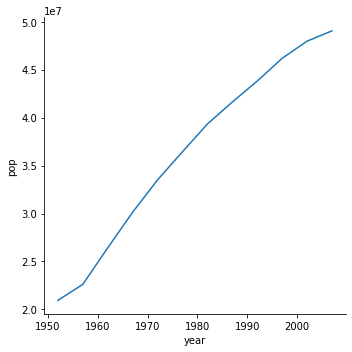

In [ ]:
#gapminder_kr 데이터에서 year 와 pop의 관계를 시각화하라. relplot() 을 이용하며, kind = 'line' 을 명시하라.

sns.relplot(data = gapminder_kr, 
            x='year', 
            y='pop',
            kind='line')

## 1.4 선 그래프를 그리는 axes-level 함수: lineplot()

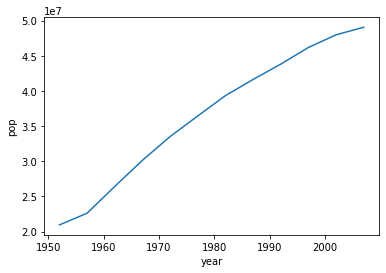

In [ ]:
sns.lineplot(data = gapminder_kr, x='year', y='pop')

#2. 데이터의 분포 시각화 (distributional)


* 한 수치형 변수( x )의 분포: 히스토그램( hist ), 밀도함수( kde ), 누적분포함수( ecdf ) 
* 두 수치형 변수( x , y )의 분포: (2차원) 히스토그램, (2차원) 밀도함수

* 분포의 시각화: sns.displot()

paste unfinished


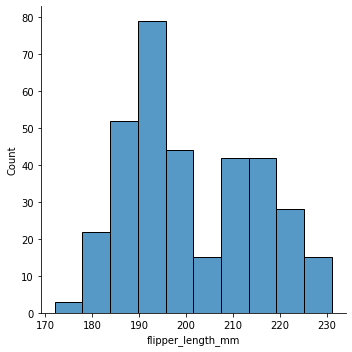

In [ ]:
# 기본 히스토그램
sns.displot(data = penguins, x = 'flipper_length_mm')

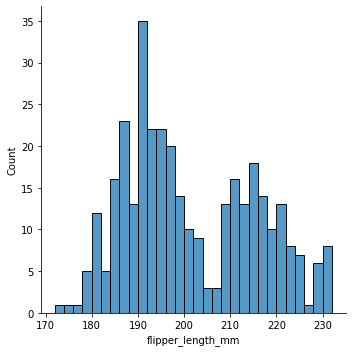

In [ ]:
# 히스토그램의 빈 갯수 또는 빈 크기 조정
sns.displot(data = penguins, x = 'flipper_length_mm', binwidth = 2)

In [ ]:
#.... paste

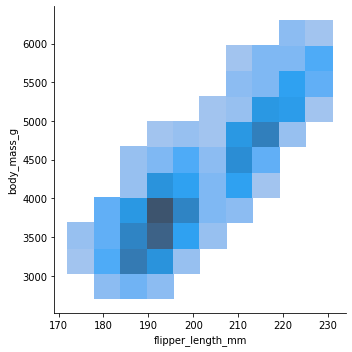

In [ ]:
sns.displot(data = penguins, x='flipper_length_mm', y='body_mass_g')

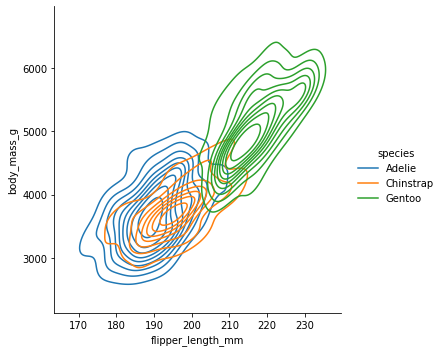

In [ ]:
sns.displot(data=penguins, x='flipper_length_mm', y='body_mass_g',
            kind = 'kde', hue = 'species')
# paste

## 2.1 여러 변수의 분포

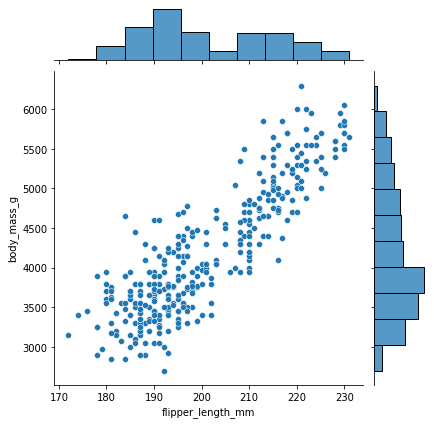

In [ ]:
sns.jointplot(data = penguins, x='flipper_length_mm', y='body_mass_g')

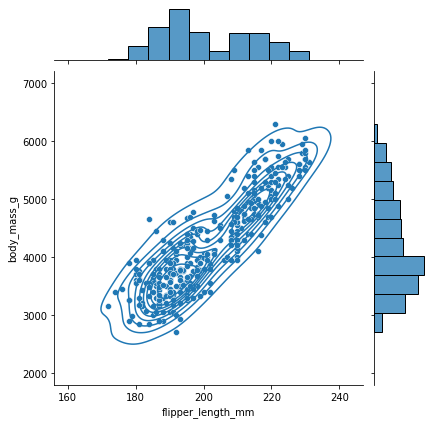

In [ ]:
g = sns.jointplot(data = penguins, x='flipper_length_mm', y='body_mass_g')
g.plot_joint(sns.kdeplot)

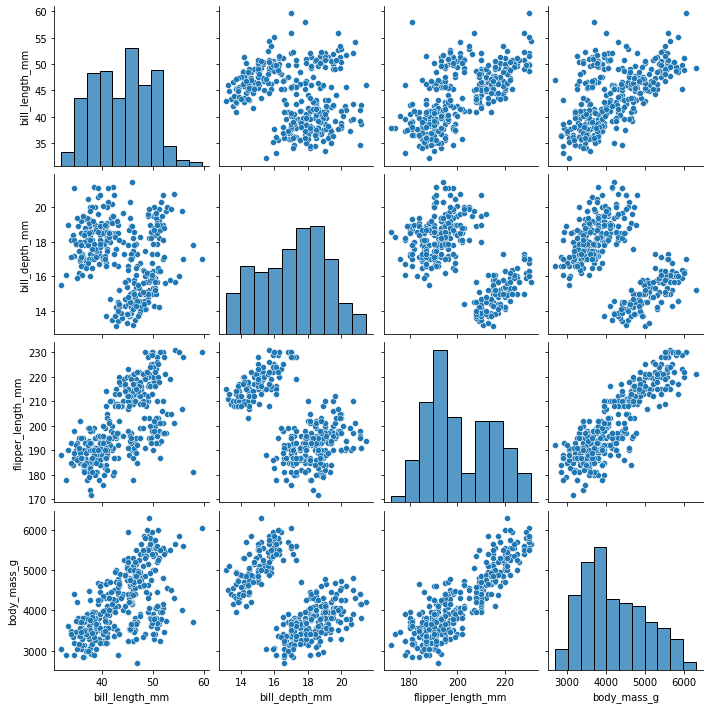

In [ ]:
sns.pairplot(data = penguins)

AttributeError: ignored

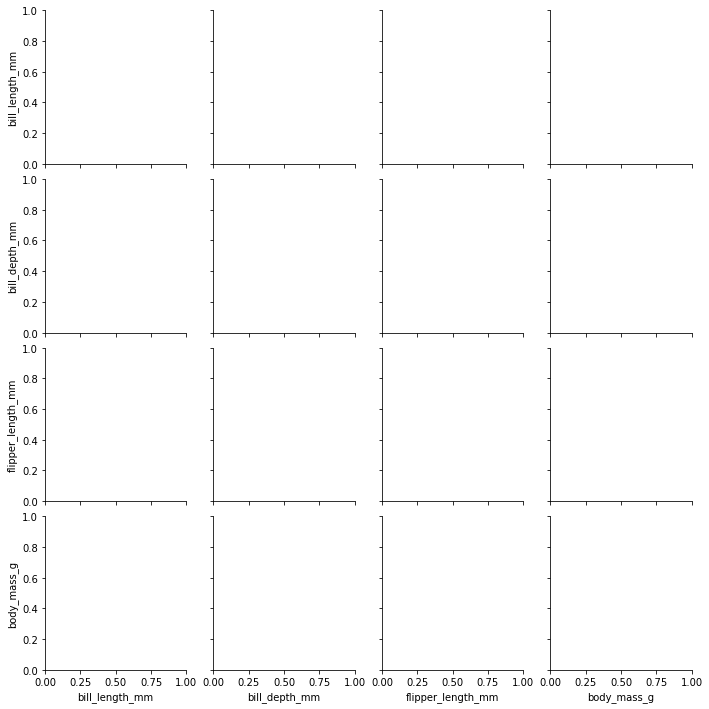

In [ ]:
sns.PairGrid(penguins, hue='species')
g.map_upper(sns. scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=10) #line weight

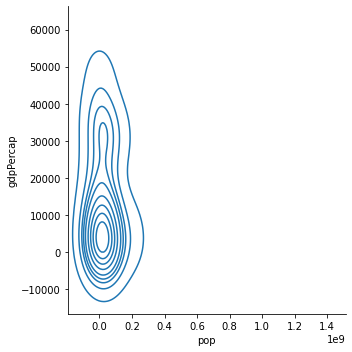

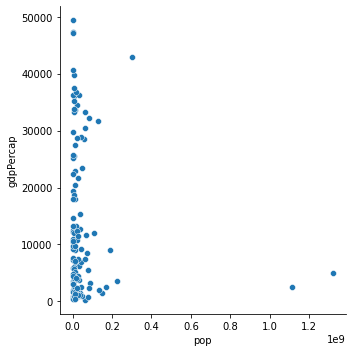

In [ ]:
gm2007 = gapminder.query('year == 2007')
sns.displot(data = gm2007, x='pop', y='gdpPercap', kind='kde')
sns.relplot(data =gm2007, x = 'pop', y = 'gdpPercap')

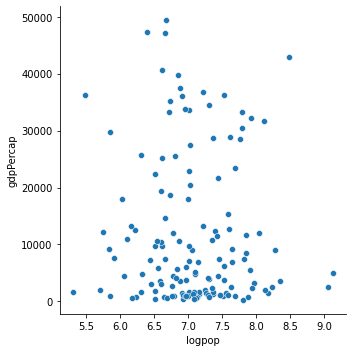

In [ ]:
# 2.
gm2007_log = gm2007.assign(logpop = np.log10(gm2007['pop'])).drop(columns = 'pop') 
sns.relplot(data = gm2007_log, x = 'logpop', y = 'gdpPercap')

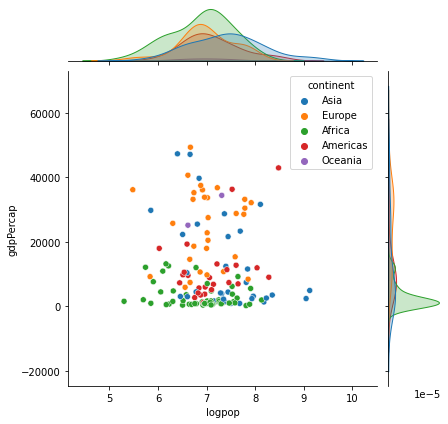

In [ ]:
#3. 2번에 이어, 이번에는 대륙별 분포가 다른지를 조사하고자 한다. jointplot 을 이용하여 대륙별 인구수와 국내총생산의 분포를 표시하라.

sns.jointplot(data = gm2007_log, x='logpop', y='gdpPercap', hue = 'continent')

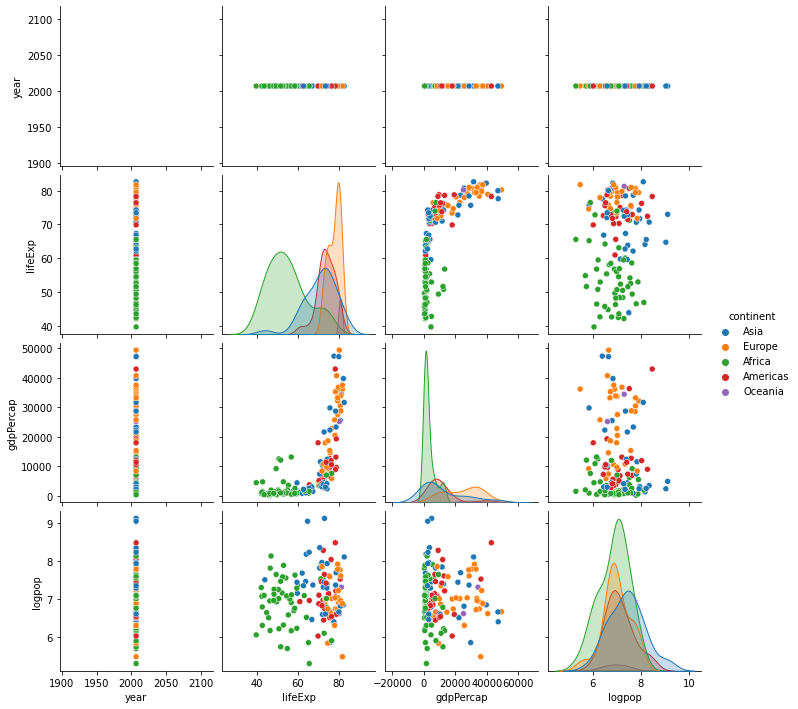

In [ ]:
#4
sns.pairplot(data=gm2007_log, hue='continent')

# 3. 범주형 변수의 값에 따른 수치형 변수의 조건부 분포 (categorical)

paste

## 3-2. Categorical distribution plots

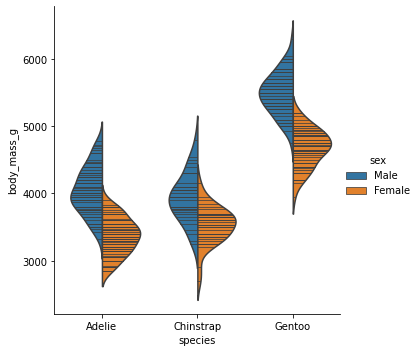

In [ ]:
#violin plot
sns.catplot(x='species', y='body_mass_g', data=penguins, hue='sex', split=True, kind='violin', inner='stick')

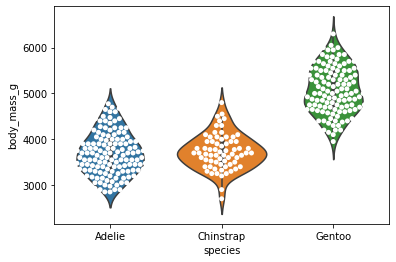

In [ ]:
# axes-level 함수들을 이용하면 두 가지 그림을 겹쳐 그리는 것도 가능함

sns.violinplot(x='species', y='body_mass_g', data=penguins)
sns.swarmplot(x='species', y='body_mass_g', data=penguins, color='white')

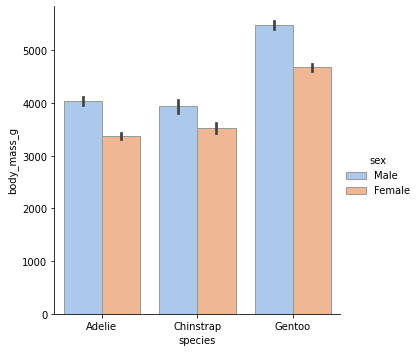

In [ ]:
sns.catplot(x='species', y='body_mass_g', hue='sex', data=penguins, kind='bar', 
            palette = 'pastel', edgecolor='.6')

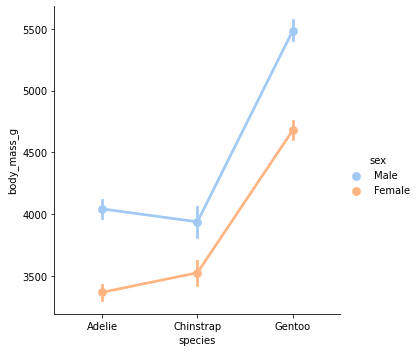

In [ ]:
sns.catplot(x='species', y='body_mass_g', hue='sex', data=penguins, kind='point', 
            palette = 'pastel', edgecolor='.6')

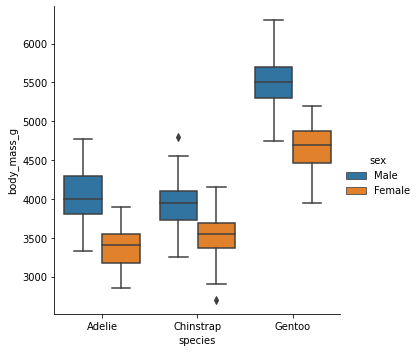

In [ ]:
sns.catplot(x='species', y='body_mass_g', hue='sex',data=penguins,
            kind='box')

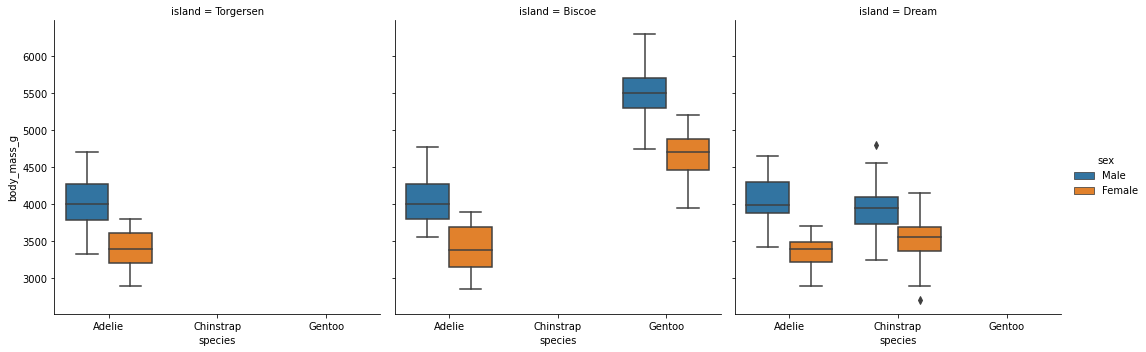

In [ ]:
sns.catplot(x='species', y='body_mass_g', hue='sex',data=penguins,
            kind='box', col='island')

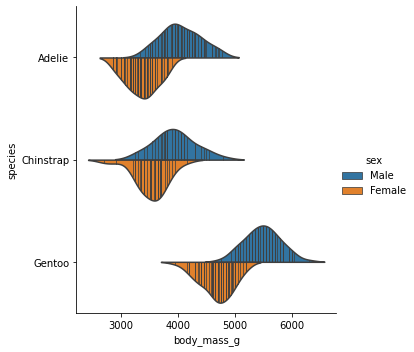

In [ ]:
sns.catplot(data=penguins, y='species', x='body_mass_g', kind='violin', hue='sex', split=True, inner = 'stick')